# Analítica Avanzada de datos con PySpark

En esta práctica trabajaremos con una data con cerca de 2 millones de registros

In [1]:
#import findspark
#findspark.init()

import pandas as pd
import pyspark

In [2]:
from pyspark.sql import functions as f
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Inicio de la sesión de Spark

In [3]:
from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master("local[*]")\
        .appName('PySpark_Tutorial')\
        .getOrCreate()

## Análisis exploratorio de Datos

### Lectura de datos

In [4]:
# Cargamos un Set de Datos sobre el precio de las acciones en USA, desde Enero de 2019 hasta Julio de 2020 (fuente: Kaggle.com):
data = spark.read.csv(
    './data/stocks_price_final.csv',
    sep = ',',
    header = True,    
    #schema = final_struc
    )

In [5]:
# Mostramos los primeros N registros:
N = 5
data.show(N)

+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+
|_c0|symbol|      date|     open|     high|      low|    close| volume| adjusted|market.cap|       sector|            industry|exchange|
+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+
|  1|   TXG|2019-09-12|       54|       58|       51|    52.75|7326300|    52.75|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  2|   TXG|2019-09-13|    52.75|   54.355|49.150002|    52.27|1025200|    52.27|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  3|   TXG|2019-09-16|52.450001|       56|52.009998|55.200001| 269900|55.200001|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  4|   TXG|2019-09-17|56.209999|60.900002|   55.423|56.779999| 602800|56.779999|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  5|   TXG|2019-09-18|56.849998|    62.2

In [6]:
# Extraemos el número de registros del DataFrame
data.count()

1729034

In [7]:
#Extrae el primer registro del DataFrame:
data.first()

Row(_c0='1', symbol='TXG', date='2019-09-12', open='54', high='58', low='51', close='52.75', volume='7326300', adjusted='52.75', market.cap='$9.31B', sector='Capital Goods', industry='Biotechnology: Laboratory Analytical Instruments', exchange='NASDAQ')

In [8]:
# Mostramos los primeros 2 registrso del DataFrame con "head()":
data.head(2)

[Row(_c0='1', symbol='TXG', date='2019-09-12', open='54', high='58', low='51', close='52.75', volume='7326300', adjusted='52.75', market.cap='$9.31B', sector='Capital Goods', industry='Biotechnology: Laboratory Analytical Instruments', exchange='NASDAQ'),
 Row(_c0='2', symbol='TXG', date='2019-09-13', open='52.75', high='54.355', low='49.150002', close='52.27', volume='1025200', adjusted='52.27', market.cap='$9.31B', sector='Capital Goods', industry='Biotechnology: Laboratory Analytical Instruments', exchange='NASDAQ')]

In [9]:
# Mostramos los primeros 2 registrso del DataFrame con "take()":
data.take(2)

[Row(_c0='1', symbol='TXG', date='2019-09-12', open='54', high='58', low='51', close='52.75', volume='7326300', adjusted='52.75', market.cap='$9.31B', sector='Capital Goods', industry='Biotechnology: Laboratory Analytical Instruments', exchange='NASDAQ'),
 Row(_c0='2', symbol='TXG', date='2019-09-13', open='52.75', high='54.355', low='49.150002', close='52.27', volume='1025200', adjusted='52.27', market.cap='$9.31B', sector='Capital Goods', industry='Biotechnology: Laboratory Analytical Instruments', exchange='NASDAQ')]

In [10]:
# Mostramos la forma del esquema del DataFrame:
data.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- symbol: string (nullable = true)
 |-- date: string (nullable = true)
 |-- open: string (nullable = true)
 |-- high: string (nullable = true)
 |-- low: string (nullable = true)
 |-- close: string (nullable = true)
 |-- volume: string (nullable = true)
 |-- adjusted: string (nullable = true)
 |-- market.cap: string (nullable = true)
 |-- sector: string (nullable = true)
 |-- industry: string (nullable = true)
 |-- exchange: string (nullable = true)



In [11]:
# Otra forma de mostrar el esquema del DataFrame:
data.schema

# Cada tupla contiene:
# en la primer entrada -> Nombre de la columna
# en la segunda entrada -> Tipo de dato
# en la tercer entrada -> True o False, dependiendo si la columna permite campos vacíos

StructType(List(StructField(_c0,StringType,true),StructField(symbol,StringType,true),StructField(date,StringType,true),StructField(open,StringType,true),StructField(high,StringType,true),StructField(low,StringType,true),StructField(close,StringType,true),StructField(volume,StringType,true),StructField(adjusted,StringType,true),StructField(market.cap,StringType,true),StructField(sector,StringType,true),StructField(industry,StringType,true),StructField(exchange,StringType,true)))

In [12]:
# mostramos los nombres y tipos de dato de cada columna:
data.dtypes

[('_c0', 'string'),
 ('symbol', 'string'),
 ('date', 'string'),
 ('open', 'string'),
 ('high', 'string'),
 ('low', 'string'),
 ('close', 'string'),
 ('volume', 'string'),
 ('adjusted', 'string'),
 ('market.cap', 'string'),
 ('sector', 'string'),
 ('industry', 'string'),
 ('exchange', 'string')]

In [13]:
# Extrae los nombres de las columnas del DataFrame
data.columns

['_c0',
 'symbol',
 'date',
 'open',
 'high',
 'low',
 'close',
 'volume',
 'adjusted',
 'market.cap',
 'sector',
 'industry',
 'exchange']

#### Extraemos estadisticas simples de todas las columnas del DataFrame

Dichas estadísticas simples incluyen: conteo, mediana, desviación estándar, mínimo y máximo de cada columna

In [14]:
data.describe().show()

+-------+-----------------+-------+----------+------------------+------------------+------------------+------------------+-----------------+------------------+----------+----------------+--------------------+--------+
|summary|              _c0| symbol|      date|              open|              high|               low|             close|           volume|          adjusted|market.cap|          sector|            industry|exchange|
+-------+-----------------+-------+----------+------------------+------------------+------------------+------------------+-----------------+------------------+----------+----------------+--------------------+--------+
|  count|          1729034|1729034|   1729034|           1729034|           1729034|           1729034|           1729034|          1729034|           1729034|   1729034|         1729034|             1729034| 1729034|
|   mean|         864517.5|   null|      null|15070.071703341047|15555.067268137087|14557.808227578987| 15032.71485433071|139710

In [15]:
# mostramos la descripción de estadísticas en un DataFrame de Pandas:
data.describe().toPandas()

,summary,_c0,symbol,date,open,high,low,close,volume,adjusted,market.cap,sector,industry,exchange
0,count,1729034,1729034,1729034,1729034,1729034,1729034,1729034,1729034,1729034,1729034,1729034,1729034,1729034
1,mean,864517.5,None,None,15070.071703341047,15555.067268137087,14557.808227578987,15032.71485433071,1397105.431259091,14926.109688795501,None,None,None,None
2,stddev,499129.2670065541,None,None,1111821.8002863121,1148247.1953514938,1072968.155843422,1109755.9294000654,5185985.456030854,1101877.6328940047,None,None,None,None
3,min,1,A,2019-01-02,0.072,0.078,0.052,0.071,0,-0.388907,$1.01B,Basic Industries,Accident &Health Insurance,NASDAQ
4,max,999999,ZYXI,2020-07-22,NA,NA,NA,NA,NA,NA,$9B,Transportation,Wholesale Distributors,NYSE


### Edición del esquema

A continuación cambiamos el esquema inferido por Spark, es decir definimos el nombre de las columnas y el tipo de datos a usar:

In [16]:
# Importamos todas las funciones para los tipos de datos:
from pyspark.sql.types import *

# Ya que analizamos el esquema por default, definimos el nuevo esquema:
data_schema = [
               StructField('c0', IntegerType(), True),
               StructField('symbol', StringType(), True),
               StructField('date', DateType(), True),
               StructField('open', DoubleType(), True),
               StructField('high', DoubleType(), True),
               StructField('low', DoubleType(), True),
               StructField('close', DoubleType(), True),
               StructField('volume', IntegerType(), True),
               StructField('adjusted', DoubleType(), True),
               StructField('market.cap', StringType(), True),
               StructField('sector', StringType(), True),
               StructField('industry', StringType(), True),
               StructField('exchange', StringType(), True),
            ]

# El valor booleano "True" indica que puede haber valores nulos, de lo contrario ponemos "False"


# Guardamos en una lista la estructura del esquema:
final_struc = StructType(fields=data_schema)

In [17]:
# Reemplazamos el DataFrame con el nuevo esquema:
data = spark.read.csv(
    './data/stocks_price_final.csv',
    sep = ',',
    header = True,
    schema = final_struc
    )

In [18]:
# mostramos los nombres y tipos de dato de cada columna:
data.dtypes

[('c0', 'int'),
 ('symbol', 'string'),
 ('date', 'date'),
 ('open', 'double'),
 ('high', 'double'),
 ('low', 'double'),
 ('close', 'double'),
 ('volume', 'int'),
 ('adjusted', 'double'),
 ('market.cap', 'string'),
 ('sector', 'string'),
 ('industry', 'string'),
 ('exchange', 'string')]

In [19]:
# Mostramos los primeros N registros
data.show(N)

+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+
| c0|symbol|      date|     open|     high|      low|    close| volume| adjusted|market.cap|       sector|            industry|exchange|
+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+
|  1|   TXG|2019-09-12|     54.0|     58.0|     51.0|    52.75|7326300|    52.75|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  2|   TXG|2019-09-13|    52.75|   54.355|49.150002|    52.27|1025200|    52.27|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  3|   TXG|2019-09-16|52.450001|     56.0|52.009998|55.200001| 269900|55.200001|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  4|   TXG|2019-09-17|56.209999|60.900002|   55.423|56.779999| 602800|56.779999|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  5|   TXG|2019-09-18|56.849998|    62.2

#### Selección de valores específicos:

La forma óptima es seleccionar la columna con `.select()`, aplicar un `.collect()` e indicar el índice del renglón.

In [20]:
i = 2
j = "open" 

data.select([j]).collect()[i][0]

52.450001

#### Agregación de nuevas columnas:

In [21]:
# Definimos una función que calcula el promedio de dos valores:
def f_mean(x1,x2):
    return (x1 + x2)/2

In [22]:
# Agregamos 2 columnas (usando la función "f_mean"):
data = data.withColumn( "promedio_1", f_mean(data["high"],data["low"]) )
data = data.withColumn( "promedio_2", f_mean(data["high"],data["low"]) )

data.show(N)

+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+------------------+------------------+
| c0|symbol|      date|     open|     high|      low|    close| volume| adjusted|market.cap|       sector|            industry|exchange|        promedio_1|        promedio_2|
+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+------------------+------------------+
|  1|   TXG|2019-09-12|     54.0|     58.0|     51.0|    52.75|7326300|    52.75|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|              54.5|              54.5|
|  2|   TXG|2019-09-13|    52.75|   54.355|49.150002|    52.27|1025200|    52.27|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|51.752500999999995|51.752500999999995|
|  3|   TXG|2019-09-16|52.450001|     56.0|52.009998|55.200001| 269900|55.200001|    $9.31B|Capital Goods|Biotechnology: La..

#### Cambiar el nombre de las columnas:

In [23]:
data = data.withColumnRenamed("promedio_1" , "promedio")
data = data.withColumnRenamed("market.cap" , "market_cap")

data.show(N)

+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+------------------+------------------+
| c0|symbol|      date|     open|     high|      low|    close| volume| adjusted|market_cap|       sector|            industry|exchange|          promedio|        promedio_2|
+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+------------------+------------------+
|  1|   TXG|2019-09-12|     54.0|     58.0|     51.0|    52.75|7326300|    52.75|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|              54.5|              54.5|
|  2|   TXG|2019-09-13|    52.75|   54.355|49.150002|    52.27|1025200|    52.27|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|51.752500999999995|51.752500999999995|
|  3|   TXG|2019-09-16|52.450001|     56.0|52.009998|55.200001| 269900|55.200001|    $9.31B|Capital Goods|Biotechnology: La..

In [24]:
data.printSchema()

root
 |-- c0: integer (nullable = true)
 |-- symbol: string (nullable = true)
 |-- date: date (nullable = true)
 |-- open: double (nullable = true)
 |-- high: double (nullable = true)
 |-- low: double (nullable = true)
 |-- close: double (nullable = true)
 |-- volume: integer (nullable = true)
 |-- adjusted: double (nullable = true)
 |-- market_cap: string (nullable = true)
 |-- sector: string (nullable = true)
 |-- industry: string (nullable = true)
 |-- exchange: string (nullable = true)
 |-- promedio: double (nullable = true)
 |-- promedio_2: double (nullable = true)



### Eliminamos columnas inservibles

In [25]:
# Eliminamos la columna "market_cap"
data = data.drop('market_cap')

# Eliminamos la columna "promedio_2"
data = data.drop('promedio_2')

data.show(N)

+---+------+----------+---------+---------+---------+---------+-------+---------+-------------+--------------------+--------+------------------+
| c0|symbol|      date|     open|     high|      low|    close| volume| adjusted|       sector|            industry|exchange|          promedio|
+---+------+----------+---------+---------+---------+---------+-------+---------+-------------+--------------------+--------+------------------+
|  1|   TXG|2019-09-12|     54.0|     58.0|     51.0|    52.75|7326300|    52.75|Capital Goods|Biotechnology: La...|  NASDAQ|              54.5|
|  2|   TXG|2019-09-13|    52.75|   54.355|49.150002|    52.27|1025200|    52.27|Capital Goods|Biotechnology: La...|  NASDAQ|51.752500999999995|
|  3|   TXG|2019-09-16|52.450001|     56.0|52.009998|55.200001| 269900|55.200001|Capital Goods|Biotechnology: La...|  NASDAQ|         54.004999|
|  4|   TXG|2019-09-17|56.209999|60.900002|   55.423|56.779999| 602800|56.779999|Capital Goods|Biotechnology: La...|  NASDAQ|     

### Tratamiento de registros con campos vacíos:

Primero crearemos una función para extraer dicha información, posteriormente veremos una forma optima de hacerlo a partir de `select`

In [26]:
# Creamos una función que regresa un DataFrame de pandas con la información sobre el número de campos nulos en cada columna:
def cols_n_nulls(df_spark):
    # Extraemos el nombre de cada columna:
    cols = df_spark.columns

    # Numero de registros del DataFrame
    n = df_spark.count()

    # Creamos la lista en donde guardaremos el número de campos vacíos de cada columna:
    l = []
    for c in cols:
        # Obtenemos  el número de campos nulos en la columna actual:
        nulls_in_c = df_spark.filter( df_spark[ c ].isNull() ).count()
        # agregamos dato a la lista: 
        l.append( nulls_in_c )
    
    # Creamos DataFrame de pandas (inicialmente vacío):
    df_pd = pd.DataFrame()
    # Agregamos las listas en columnas del DataFrame:  
    df_pd['col_name'] = cols
    df_pd['n_nulls'] = l
    df_pd['porcentaje'] = df_pd['n_nulls']/n * 100

    # Ordenamos DataFrame de forma descendente:
    df_pd = df_pd.sort_values('n_nulls', ascending = False)
    #df_pd = df_pd.reset_index()

    return df_pd

In [27]:
# Mostramos el registro de campos nulos:
df_cols_nulls = cols_n_nulls(data)
df_cols_nulls

,col_name,n_nulls,porcentaje
7,volume,3827,0.221337
3,open,2733,0.158065
4,high,2733,0.158065
5,low,2733,0.158065
6,close,2733,0.158065
8,adjusted,2733,0.158065
12,promedio,2733,0.158065
0,c0,0,0.000000
1,symbol,0,0.000000
2,date,0,0.000000


#### Forma óptima de calcular el número de campos vacíos en todas las columnas de un DataFrame

In [28]:
# Podemos hacer lo anterior (de forma optima) mediante:
from pyspark.sql.functions import col, isnan, when, count

data.select( [ count( when( col(c).isNull() , True) ).alias(c) for c in data.columns ] ).show()

# Más adelante podremos ver el efecto de la función "when"

+---+------+----+----+----+----+-----+------+--------+------+--------+--------+--------+
| c0|symbol|date|open|high| low|close|volume|adjusted|sector|industry|exchange|promedio|
+---+------+----+----+----+----+-----+------+--------+------+--------+--------+--------+
|  0|     0|   0|2733|2733|2733| 2733|  3827|    2733|     0|       0|       0|    2733|
+---+------+----+----+----+----+-----+------+--------+------+--------+--------+--------+



En el ejemplo anterior podemos ver que `.select()` nos permite crear nuevas columnas

In [29]:
data.count()

1729034

In [30]:
data.filter( data["volume"].isNull() ).show(N)

+----+------+----------+---------+---------+---------+---------+------+---------+-------------+--------------------+--------+----------+
|  c0|symbol|      date|     open|     high|      low|    close|volume| adjusted|       sector|            industry|exchange|  promedio|
+----+------+----------+---------+---------+---------+---------+------+---------+-------------+--------------------+--------+----------+
|2204|  ONEM|2020-03-17|20.959999|    22.48|19.665001|    21.35|  null|    21.35|  Health Care|Medical/Nursing S...|  NASDAQ|21.0725005|
|3142|  VNET|2019-04-05|     7.91|     7.95|     7.79|     7.84|  null|     7.84|   Technology|Computer Software...|  NASDAQ|      7.87|
|4378|  KRKR|2020-05-11|     null|     null|     null|     null|  null|     null|Miscellaneous|   Business Services|  NASDAQ|      null|
|4727|  JOBS|2020-03-10|68.599998|69.860001|66.620003|69.739998|  null|69.739998|   Technology|Diversified Comme...|  NASDAQ| 68.240002|
|5747|  NMTR|2020-01-23|     null|     nu

In [31]:
data.filter( data["open"].isNull() ).show(N)

+----+------+----------+----+----+----+-----+------+--------+-------------+--------------------+--------+--------+
|  c0|symbol|      date|open|high| low|close|volume|adjusted|       sector|            industry|exchange|promedio|
+----+------+----------+----+----+----+-----+------+--------+-------------+--------------------+--------+--------+
|4378|  KRKR|2020-05-11|null|null|null| null|  null|    null|Miscellaneous|   Business Services|  NASDAQ|    null|
|5747|  NMTR|2020-01-23|null|null|null| null|  null|    null|  Health Care|Major Pharmaceuti...|  NASDAQ|    null|
|5748|  NMTR|2020-01-24|null|null|null| null|  null|    null|  Health Care|Major Pharmaceuti...|  NASDAQ|    null|
|5749|  NMTR|2020-01-27|null|null|null| null|  null|    null|  Health Care|Major Pharmaceuti...|  NASDAQ|    null|
|5750|  NMTR|2020-01-28|null|null|null| null|  null|    null|  Health Care|Major Pharmaceuti...|  NASDAQ|    null|
+----+------+----------+----+----+----+-----+------+--------+-------------+-----

Extraemos la media de una columna para colocarla en los campos nulos:

In [32]:
data.agg( {"volume": "avg"} ).show()

+------------------+
|       avg(volume)|
+------------------+
|1397692.1627885813|
+------------------+



In [33]:
mu_volume = data.agg( {"volume": "avg"} ).collect()[0][0]
mu_volume

1397692.1627885813

In [34]:
# LLenamos los campos nulos de la columna "volume" con la media de dicha columna:
data = data.fillna( mu_volume, ["volume"])

In [35]:
# Mostramos el registro de campos nulos (de forma optima):
data.select( [ count( when( col(c).isNull() , True ) ).alias(c) for c in data.columns ] ).show()

+---+------+----+----+----+----+-----+------+--------+------+--------+--------+--------+
| c0|symbol|date|open|high| low|close|volume|adjusted|sector|industry|exchange|promedio|
+---+------+----+----+----+----+-----+------+--------+------+--------+--------+--------+
|  0|     0|   0|2733|2733|2733| 2733|     0|    2733|     0|       0|       0|    2733|
+---+------+----+----+----+----+-----+------+--------+------+--------+--------+--------+



#### Podemos aplicar la función `Imputer` para que de forma automática Spark defina si rellenar los campos vacíos con media, mediana o moda:

In [36]:
from pyspark.ml.feature import Imputer

cols_in = [ "open" , "high" , "low" , "close" , "adjusted" ]
cols_out = [ "open" , "high" , "low" , "close" , "adjusted"]
# Nota: Si los nombres de las columnas de salida son los mismos que las columnas de entrada,
# se reemplazarán las columnas de entrada, de lo contrario se agregan al DataFrame. 

imputer = Imputer( inputCols= cols_in, outputCols= cols_out)

model = imputer.fit(data)

In [37]:
# Aplicamos la transformación al DataFrame actual:
data = model.transform(data)

In [38]:
# Mostramos el registro de campos nulos (de forma optima):
data.select( [ count( when( col(c).isNull() , True ) ).alias(c) for c in data.columns ] ).show()

+---+------+----+----+----+---+-----+------+--------+------+--------+--------+--------+
| c0|symbol|date|open|high|low|close|volume|adjusted|sector|industry|exchange|promedio|
+---+------+----+----+----+---+-----+------+--------+------+--------+--------+--------+
|  0|     0|   0|   0|   0|  0|    0|     0|       0|     0|       0|       0|    2733|
+---+------+----+----+----+---+-----+------+--------+------+--------+--------+--------+



In [39]:
data.count()

1729034

In [40]:
# Eliminamos registros con algún "any" campo nulo:
data = data.dropna(how = "any")

# Eliminamos registros con todos "all" los campos nulos:
#data = data.dropna(how = "all")

In [41]:
# Mostramos el registro de campos nulos (de forma optima):
data.select( [ count( when( col(c).isNull() , True ) ).alias(c) for c in data.columns ] ).show()

+---+------+----+----+----+---+-----+------+--------+------+--------+--------+--------+
| c0|symbol|date|open|high|low|close|volume|adjusted|sector|industry|exchange|promedio|
+---+------+----+----+----+---+-----+------+--------+------+--------+--------+--------+
|  0|     0|   0|   0|   0|  0|    0|     0|       0|     0|       0|       0|       0|
+---+------+----+----+----+---+-----+------+--------+------+--------+--------+--------+



In [42]:
data.count()

1726301

In [43]:
data.show(N)

+---+------+----------+---------+---------+---------+---------+-------+---------+-------------+--------------------+--------+------------------+
| c0|symbol|      date|     open|     high|      low|    close| volume| adjusted|       sector|            industry|exchange|          promedio|
+---+------+----------+---------+---------+---------+---------+-------+---------+-------------+--------------------+--------+------------------+
|  1|   TXG|2019-09-12|     54.0|     58.0|     51.0|    52.75|7326300|    52.75|Capital Goods|Biotechnology: La...|  NASDAQ|              54.5|
|  2|   TXG|2019-09-13|    52.75|   54.355|49.150002|    52.27|1025200|    52.27|Capital Goods|Biotechnology: La...|  NASDAQ|51.752500999999995|
|  3|   TXG|2019-09-16|52.450001|     56.0|52.009998|55.200001| 269900|55.200001|Capital Goods|Biotechnology: La...|  NASDAQ|         54.004999|
|  4|   TXG|2019-09-17|56.209999|60.900002|   55.423|56.779999| 602800|56.779999|Capital Goods|Biotechnology: La...|  NASDAQ|     

## Selección de datos con PySpark SQL
* Select
* Filter
* Between
* When
* Like
* GroupBy
* Aggregations 

### Select

In [44]:
print( data.columns )

['c0', 'symbol', 'date', 'open', 'high', 'low', 'close', 'volume', 'adjusted', 'sector', 'industry', 'exchange', 'promedio']


In [45]:
data.select(['open', 'high', 'low', 'close', 'volume', 'adjusted','promedio']).describe().show()

+-------+------------------+------------------+------------------+------------------+-----------------+------------------+-------------------+
|summary|              open|              high|               low|             close|           volume|          adjusted|           promedio|
+-------+------------------+------------------+------------------+------------------+-----------------+------------------+-------------------+
|  count|           1726301|           1726301|           1726301|           1726301|          1726301|           1726301|            1726301|
|   mean|15070.071703341047|15555.067268137087|14557.808227578987| 15032.71485433071|1397692.162685418|14926.109688795501| 15056.437747857985|
| stddev|1111821.8002863121|1148247.1953514938| 1072968.155843422|1109755.9294000654|5185878.915390306|1101877.6328940047| 1110364.3670637733|
|    min|             0.072|             0.078|             0.052|             0.071|                0|         -1.230099|0.07450000000000001|

### Filter

In [46]:
# Extraemos TODOS los registros que van del '2020-01-01' al '2020-01-31'
data.filter( ( data['date'] >= '2020-01-01' )&( data['date'] <= '2020-01-31' ) ).show(N)

+---+------+----------+---------+---------+---------+---------+------+---------+-------------+--------------------+--------+-----------------+
| c0|symbol|      date|     open|     high|      low|    close|volume| adjusted|       sector|            industry|exchange|         promedio|
+---+------+----------+---------+---------+---------+---------+------+---------+-------------+--------------------+--------+-----------------+
| 78|   TXG|2020-01-02|76.910004|77.989998|71.480003|72.830002|220200|72.830002|Capital Goods|Biotechnology: La...|  NASDAQ|       74.7350005|
| 79|   TXG|2020-01-03|71.519997|76.188004|70.580002|75.559998|288300|75.559998|Capital Goods|Biotechnology: La...|  NASDAQ|        73.384003|
| 80|   TXG|2020-01-06|75.269997|77.349998|73.559998|75.550003|220600|75.550003|Capital Goods|Biotechnology: La...|  NASDAQ|75.45499799999999|
| 81|   TXG|2020-01-07|     76.0|77.279999|    75.32|75.980003|182400|75.980003|Capital Goods|Biotechnology: La...|  NASDAQ|       76.2999995|

In [47]:
data.filter( ( data['date'] >= '2020-01-01' )&( data['date'] <= '2020-01-31' ) ).count()

94319

### Filter & Select

In [48]:
data.filter( ( data['date'] >= '2020-01-01' )&( data['date'] <= '2020-01-31' ) ).select(['date','exchange','promedio']).show(N)

+----------+--------+-----------------+
|      date|exchange|         promedio|
+----------+--------+-----------------+
|2020-01-02|  NASDAQ|       74.7350005|
|2020-01-03|  NASDAQ|        73.384003|
|2020-01-06|  NASDAQ|75.45499799999999|
|2020-01-07|  NASDAQ|       76.2999995|
|2020-01-08|  NASDAQ|       74.8449975|
+----------+--------+-----------------+
only showing top 5 rows



### Between

In [49]:
data.filter( data['adjusted'].between(100.0 , 500.0) ).show(N)

+----+------+----------+----------+----------+----------+----------+------+----------+-------------+--------------------+--------+------------------+
|  c0|symbol|      date|      open|      high|       low|     close|volume|  adjusted|       sector|            industry|exchange|          promedio|
+----+------+----------+----------+----------+----------+----------+------+----------+-------------+--------------------+--------+------------------+
|  93|   TXG|2020-01-24| 95.459999|     101.0| 94.157997|100.790001|328100|100.790001|Capital Goods|Biotechnology: La...|  NASDAQ|        97.5789985|
|  94|   TXG|2020-01-27| 99.760002|104.892998| 97.019997|103.209999|334900|103.209999|Capital Goods|Biotechnology: La...|  NASDAQ|100.95649750000001|
|  95|   TXG|2020-01-28|104.620003|108.269997|103.297997|106.620003|245400|106.620003|Capital Goods|Biotechnology: La...|  NASDAQ|        105.783997|
|6893|  ABMD|2019-01-02|315.940002|320.709991|307.029999|309.959991|590000|309.959991|  Health Care|

### Between & Select

In [50]:
data.filter( data['adjusted'].between(100.0 , 500.0) ).select(['date','adjusted','promedio']).show(N)

+----------+----------+------------------+
|      date|  adjusted|          promedio|
+----------+----------+------------------+
|2020-01-24|100.790001|        97.5789985|
|2020-01-27|103.209999|100.95649750000001|
|2020-01-28|106.620003|        105.783997|
|2019-01-02|309.959991|        313.869995|
|2019-01-03|302.290009|        302.699997|
+----------+----------+------------------+
only showing top 5 rows



### When

Permite asignar un valor u otro, dependiendo si se cumple o no cirta condición

In [51]:
val_1 = True
val_2 = False

data.select( [ 'open','close', f.when(data['adjusted'] >= 200.0 , val_1 ).otherwise( val_2 ) ] ).show(N)

+---------+---------+------------------------------------------------------+
|     open|    close|CASE WHEN (adjusted >= 200.0) THEN true ELSE false END|
+---------+---------+------------------------------------------------------+
|     54.0|    52.75|                                                 false|
|    52.75|    52.27|                                                 false|
|52.450001|55.200001|                                                 false|
|56.209999|56.779999|                                                 false|
|56.849998|     62.0|                                                 false|
+---------+---------+------------------------------------------------------+
only showing top 5 rows



In [52]:
# Agregamos un alias a la nueva columna:
data.select( [ 'open','close', f.when(data['adjusted'] >= 200.0 , val_1 ).otherwise( val_2 ).alias('ajuste_positivo') ] ).show(N)

+---------+---------+---------------+
|     open|    close|ajuste_positivo|
+---------+---------+---------------+
|     54.0|    52.75|          false|
|    52.75|    52.27|          false|
|52.450001|55.200001|          false|
|56.209999|56.779999|          false|
|56.849998|     62.0|          false|
+---------+---------+---------------+
only showing top 5 rows



### Extracción de datos distintos (clases) con `distnct()` 

In [53]:
# Creamos una función que regresa un DataFrame de pandas con la información sobre el número de valores distintos (clases) en cada columna:
def cols_distincts(df_spark):
    # Extraemos el nombre de cada columna:
    cols = df_spark.columns

    # Numero de registros del DataFrame
    n = df_spark.count()

    # Creamos la lista en donde guardaremos el número de valores distintos (clases) en cada columna:
    l = []
    for c in cols:
        # Obtenemos  el número de valores distintos (clases) en la columna actual:
        dist_in_c = df_spark.select(c).distinct().count()
        # agregamos dato a la lista: 
        l.append( dist_in_c )
    
    # Creamos DataFrame de pandas (inicialmente vacío):
    df_pd = pd.DataFrame()
    # Agregamos las listas en columnas del DataFrame:  
    df_pd['col_name'] = cols
    df_pd['n_distincts'] = l
    df_pd['porcentaje'] = df_pd['n_distincts']/n * 100

    # Ordenamos DataFrame de forma descendente:
    df_pd = df_pd.sort_values('n_distincts', ascending = False)
    #df_pd = df_pd.reset_index()

    return df_pd

In [54]:
selected_cols = ["symbol", "date", "sector" , "industry" , "exchange"]
cols_distincts( data.select(selected_cols) )

,col_name,n_distincts,porcentaje
0,symbol,4611,0.267103
1,date,392,0.022708
3,industry,135,0.007820
2,sector,12,0.000695
4,exchange,2,0.000116


#### Forma óptima de calcular el número de datos distintos (clases) en varias columnas de un DataFrame

In [55]:
from pyspark.sql.functions import countDistinct, col

selected_cols = ["symbol", "date", "sector" , "industry" , "exchange"]
data.select( [ countDistinct( col(c) ).alias(c) for c in selected_cols ] ).show()

+------+----+------+--------+--------+
|symbol|date|sector|industry|exchange|
+------+----+------+--------+--------+
|  4611| 392|    12|     135|       2|
+------+----+------+--------+--------+



### Like
Permite identificar registros que satisfacen alguna similitud definida

In [56]:
data.select(['sector']).distinct().show( truncate=False )
# truncate=False <-- Muestra los resultados completos sin truncar nada

+---------------------+
|sector               |
+---------------------+
|Miscellaneous        |
|Health Care          |
|Public Utilities     |
|Energy               |
|Consumer Non-Durables|
|Finance              |
|Basic Industries     |
|Capital Goods        |
|Technology           |
|Consumer Services    |
|Consumer Durables    |
|Transportation       |
+---------------------+



In [57]:
regla='T%' #<-- Empieza con 'T'
data.select(['sector']).filter( data['sector'].like(regla) ).distinct().show()

+--------------+
|        sector|
+--------------+
|    Technology|
|Transportation|
+--------------+



In [58]:
regla='%ies' #<-- Termina con 'ies'
data.select(['sector']).filter( data['sector'].like(regla) ).distinct().show()

+----------------+
|          sector|
+----------------+
|Public Utilities|
|Basic Industries|
+----------------+



In [59]:
regla='%chnolo%' #<-- contiene 'chnolo'
data.select(['sector']).filter( data['sector'].like(regla) ).distinct().show()

+----------+
|    sector|
+----------+
|Technology|
+----------+



In [60]:
regla1='Cons%' #<-- Empieza con 'Cons'
regla2='%es' #<-- Termina con 'es'
data.select(['sector']).filter( data['sector'].like(regla1) & data['sector'].like(regla2) ).distinct().show( truncate=False )


+---------------------+
|sector               |
+---------------------+
|Consumer Non-Durables|
|Consumer Services    |
|Consumer Durables    |
+---------------------+



Otra forma de usar `like`

In [61]:
# regla1: empieza con alguna de las letras H, P, E:
regla = '^[H,P,E]'
c_name = 'empieza con H,P o E'

df2 = data.select( ['sector' , data['sector'].rlike( regla ).alias(c_name) ] ).distinct()

df2.show(truncate=False)

+---------------------+-------------------+
|sector               |empieza con H,P o E|
+---------------------+-------------------+
|Consumer Non-Durables|false              |
|Health Care          |true               |
|Basic Industries     |false              |
|Finance              |false              |
|Transportation       |false              |
|Consumer Durables    |false              |
|Energy               |true               |
|Miscellaneous        |false              |
|Public Utilities     |true               |
|Consumer Services    |false              |
|Capital Goods        |false              |
|Technology           |false              |
+---------------------+-------------------+



In [62]:
df2.filter( df2[c_name]=='true' ).show()

+----------------+-------------------+
|          sector|empieza con H,P o E|
+----------------+-------------------+
|     Health Care|               true|
|          Energy|               true|
|Public Utilities|               true|
+----------------+-------------------+



### Reemplazar valores en un DataFrame

In [63]:
col = 'sector' # <-- columna a editar
old_value = 'Technology'
new_value = 'Tecnología'

data = data.replace( old_value , new_value , col)

In [64]:
data.select(col).distinct().show()

+--------------------+
|              sector|
+--------------------+
|       Miscellaneous|
|         Health Care|
|    Public Utilities|
|              Energy|
|Consumer Non-Dura...|
|             Finance|
|    Basic Industries|
|       Capital Goods|
|          Tecnología|
|   Consumer Services|
|   Consumer Durables|
|      Transportation|
+--------------------+



### GroupBy

In [65]:
data.select( ['industry', 'open' ,'close','adjusted'] ).groupBy(['industry']).mean().show(N)

+--------------------+------------------+------------------+------------------+
|            industry|         avg(open)|        avg(close)|     avg(adjusted)|
+--------------------+------------------+------------------+------------------+
|Finance/Investors...| 5.134401785714288| 5.136630739795919| 4.991354066964286|
|       Miscellaneous| 16.38588266938775|16.359879090306126|16.148959322959186|
|Investment Banker...|58.950580945750225| 58.98308596082619| 58.15783725890314|
|   Food Distributors| 43.27450856935453| 43.27317810574849| 42.91047608357857|
|        Broadcasting| 24.91678746482517| 24.91738845539515|24.699102029625312|
+--------------------+------------------+------------------+------------------+
only showing top 5 rows



In [66]:
# Cargamos funciones para generalizar el ".groupBy()"
from pyspark.sql.functions import col, min, max, avg, lit

df = data.groupBy("sector").agg(
    min("date").alias("From"), 
    max("date").alias("To"),
    
    min("open").alias("Minimum Opening"),
    max("open").alias("Maximum Opening"),
    avg("open").alias("Average Opening"), 

    min("close").alias("Minimum Closing"), 
    max("close").alias("Maximum Closing"),
    avg("close").alias("Average Closing"), 

    min("adjusted").alias("Minimum Adjusted Closing"), 
    max("adjusted").alias("Maximum Adjusted Closing"),
    avg("adjusted").alias("Average Adjusted Closing")
)

df.show( truncate=False )

+---------------------+----------+----------+---------------+---------------+------------------+---------------+---------------+------------------+------------------------+------------------------+------------------------+
|sector               |From      |To        |Minimum Opening|Maximum Opening|Average Opening   |Minimum Closing|Maximum Closing|Average Closing   |Minimum Adjusted Closing|Maximum Adjusted Closing|Average Adjusted Closing|
+---------------------+----------+----------+---------------+---------------+------------------+---------------+---------------+------------------+------------------------+------------------------+------------------------+
|Miscellaneous        |2019-01-02|2020-07-22|0.147          |1059.98999     |52.038394969006596|0.1361         |1035.829956    |52.063628549509616|0.1361                  |1035.829956             |51.80973033632299       |
|Health Care          |2019-01-02|2020-07-22|0.072          |186000.0       |119.96763306523255|0.071       

In [67]:
df.toPandas()

,sector,From,To,Minimum Opening,Maximum Opening,Average Opening,Minimum Closing,Maximum Closing,Average Closing,Minimum Adjusted Closing,Maximum Adjusted Closing,Average Adjusted Closing
0,Miscellaneous,2019-01-02,2020-07-22,0.147,1.059990e+03,52.038395,0.1361,1.035830e+03,52.063629,0.136100,1.035830e+03,51.809730
1,Health Care,2019-01-02,2020-07-22,0.072,1.860000e+05,119.967633,0.0710,1.870000e+05,119.078061,0.071000,1.870000e+05,118.973948
2,Public Utilities,2019-01-02,2020-07-22,0.331,2.800000e+02,35.580777,0.3250,2.822200e+02,35.585282,0.325000,2.806739e+02,34.730156
3,Energy,2019-01-02,2020-07-22,0.100,9.050000e+02,24.456590,0.0900,9.010400e+02,24.427350,0.090000,8.790570e+02,23.684714
4,Consumer Non-Durables,2019-01-02,2020-07-22,0.120,6.550000e+02,43.328603,0.1200,6.641300e+02,43.330386,0.120000,6.641300e+02,42.817625
5,Finance,2019-01-02,2020-07-22,0.250,1.336930e+03,37.774667,0.2700,1.341080e+03,37.779002,0.270000,1.341080e+03,37.100285
6,Basic Industries,2019-01-02,2020-07-22,0.230,1.601682e+08,266410.354701,0.2300,1.583766e+08,265750.361367,0.230000,1.572494e+08,263865.510703
7,Capital Goods,2019-01-02,2020-07-22,0.130,4.025000e+03,60.488544,0.1200,4.037770e+03,60.516555,-1.230099,4.037770e+03,59.975123
8,Tecnología,2019-01-02,2020-07-22,0.140,2.704000e+03,49.516045,0.1300,2.736000e+03,49.534799,0.130000,2.736000e+03,49.252340
9,Consumer Services,2019-01-02,2020-07-22,0.100,1.543750e+04,55.078867,0.1340,1.984375e+04,55.055248,0.134000,1.984375e+04,54.361878


### Filter & groupBy

In [68]:
df = data.filter( (data['date'] >= '2019-01-02')&(data['date'] <= '2020-01-31') ).groupBy("sector")\
    .agg(
        min("date").alias("From"), 
        max("date").alias("To"),
        
        min("open").alias("Minimum Opening"),
        max("open").alias("Maximum Opening"),
        avg("open").alias("Average Opening"), 

        min("close").alias("Minimum Closing"), 
        max("close").alias("Maximum Closing"),
        avg("close").alias("Average Closing"), 

        min("adjusted").alias("Minimum Adjusted Closing"), 
        max("adjusted").alias("Maximum Adjusted Closing"),
        avg("adjusted").alias("Average Adjusted Closing")
)

df.show( truncate=False )

+---------------------+----------+----------+---------------+---------------+------------------+---------------+---------------+------------------+------------------------+------------------------+------------------------+
|sector               |From      |To        |Minimum Opening|Maximum Opening|Average Opening   |Minimum Closing|Maximum Closing|Average Closing   |Minimum Adjusted Closing|Maximum Adjusted Closing|Average Adjusted Closing|
+---------------------+----------+----------+---------------+---------------+------------------+---------------+---------------+------------------+------------------------+------------------------+------------------------+
|Miscellaneous        |2019-01-02|2020-01-31|0.16           |690.0          |51.51619596530091 |0.16           |691.099976     |51.54953412269035 |0.16                    |691.099976              |51.210507338518944      |
|Health Care          |2019-01-02|2020-01-31|0.072          |186000.0       |146.7756197567625 |0.071       

In [69]:
df.toPandas()

,sector,From,To,Minimum Opening,Maximum Opening,Average Opening,Minimum Closing,Maximum Closing,Average Closing,Minimum Adjusted Closing,Maximum Adjusted Closing,Average Adjusted Closing
0,Miscellaneous,2019-01-02,2020-01-31,0.160,6.900000e+02,51.516196,0.160,6.911000e+02,51.549534,0.160000,6.911000e+02,51.210507
1,Health Care,2019-01-02,2020-01-31,0.072,1.860000e+05,146.775620,0.071,1.870000e+05,145.639741,0.071000,1.870000e+05,145.500927
2,Public Utilities,2019-01-02,2020-01-31,0.620,2.694600e+02,36.671042,0.660,2.699300e+02,36.684334,0.660000,2.670565e+02,35.557941
3,Energy,2019-01-02,2020-01-31,0.130,9.050000e+02,27.695591,0.130,9.010400e+02,27.676751,0.130000,8.790570e+02,26.675109
4,Consumer Non-Durables,2019-01-02,2020-01-31,0.220,4.411900e+02,44.687032,0.220,4.412600e+02,44.690289,0.220000,4.412600e+02,44.007866
5,Finance,2019-01-02,2020-01-31,0.284,1.199030e+03,40.304980,0.270,1.196230e+03,40.330617,0.270000,1.196230e+03,39.414088
6,Basic Industries,2019-01-02,2020-01-31,0.277,1.601682e+08,334814.235409,0.272,1.583766e+08,334289.255069,0.272000,1.572494e+08,331916.392615
7,Capital Goods,2019-01-02,2020-01-31,0.210,4.025000e+03,61.479283,0.220,4.030000e+03,61.526343,-1.022682,4.030000e+03,60.799926
8,Tecnología,2019-01-02,2020-01-31,0.140,2.704000e+03,49.639899,0.130,2.736000e+03,49.646973,0.130000,2.736000e+03,49.271466
9,Consumer Services,2019-01-02,2020-01-31,0.210,1.543750e+04,58.505705,0.201,1.984375e+04,58.497871,0.201000,1.984375e+04,57.569266


## Visualización gráfica de datos

Para graficar datos de Spark, es necesario pasarlos a Pandas mediante el método `toPandas()`.

Debemos tener cuidado ya que Pandas se puede saturar con los datos de Spark, por dicha razón se recomienda convertir a DataFrames de Pandas cuando se ya se han reducido Datos de Spark, por ejemplo, si tenemos registros diarios en Spark, podemos reducirlos a registros mensuales y pasarlos a Pandas.

En los siguientes ejemplos, agruparemos con respecto a la columna "sector" y "exchange", que son las que tienen el menor número de clases.

In [70]:
from pyspark.sql.functions import countDistinct, col

selected_cols = ["symbol", "date", "sector" , "industry" , "exchange"]
data.select( [ countDistinct( col(c) ).alias(c) for c in selected_cols ] ).show()

+------+----+------+--------+--------+
|symbol|date|sector|industry|exchange|
+------+----+------+--------+--------+
|  4611| 392|    12|     135|       2|
+------+----+------+--------+--------+



In [71]:
ex_df = data.groupby( "exchange" , "sector" ).count().toPandas()
ex_df

,exchange,sector,count
0,NASDAQ,Energy,21375
1,NASDAQ,Consumer Non-Durables,38596
2,NASDAQ,Consumer Services,116101
3,NASDAQ,Transportation,18966
4,NASDAQ,Tecnología,164686
5,NASDAQ,Miscellaneous,32052
6,NASDAQ,Capital Goods,64405
7,NASDAQ,Health Care,276610
8,NASDAQ,Consumer Durables,24504
9,NASDAQ,Finance,192744


In [72]:
ex_df_NASDAQ = ex_df[ ex_df['exchange']=='NASDAQ' ].sort_values('sector', ascending = False)
ex_df_NASDAQ


,exchange,sector,count
3,NASDAQ,Transportation,18966
4,NASDAQ,Tecnología,164686
10,NASDAQ,Public Utilities,20663
5,NASDAQ,Miscellaneous,32052
7,NASDAQ,Health Care,276610
9,NASDAQ,Finance,192744
0,NASDAQ,Energy,21375
2,NASDAQ,Consumer Services,116101
1,NASDAQ,Consumer Non-Durables,38596
8,NASDAQ,Consumer Durables,24504


In [73]:
ex_df_NYSE = ex_df[ ex_df['exchange']=='NYSE' ].sort_values('sector', ascending = False)
ex_df_NYSE

,exchange,sector,count
21,NYSE,Transportation,20830
12,NYSE,Tecnología,64682
14,NYSE,Public Utilities,52173
23,NYSE,Miscellaneous,18120
18,NYSE,Health Care,39000
17,NYSE,Finance,109879
16,NYSE,Energy,66119
19,NYSE,Consumer Services,155987
13,NYSE,Consumer Non-Durables,39376
22,NYSE,Consumer Durables,23900


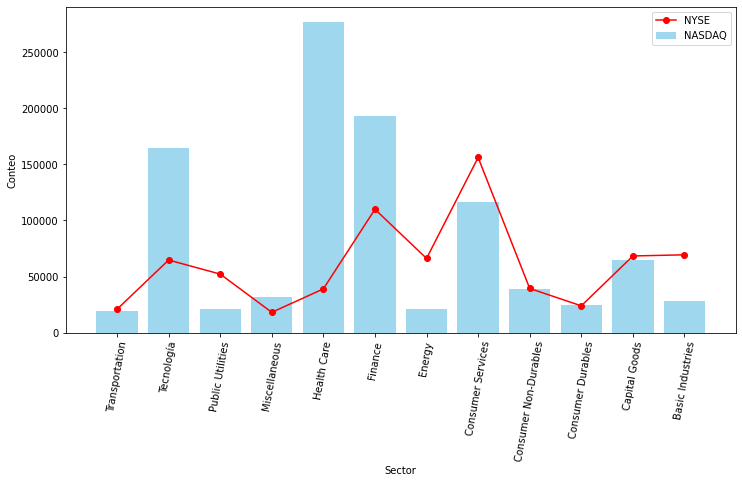

In [74]:
plt.figure(figsize=(12,6))
plt.bar( ex_df_NASDAQ['sector'] , ex_df_NASDAQ["count"], color='skyblue' , label='NASDAQ', alpha=0.8)
plt.plot( ex_df_NYSE['sector'] , ex_df_NYSE["count"] , 'o-' , color = 'red', label = 'NYSE')
plt.xticks(rotation=80)
plt.xlabel('Sector')
plt.ylabel('Conteo')
plt.legend()
plt.show()

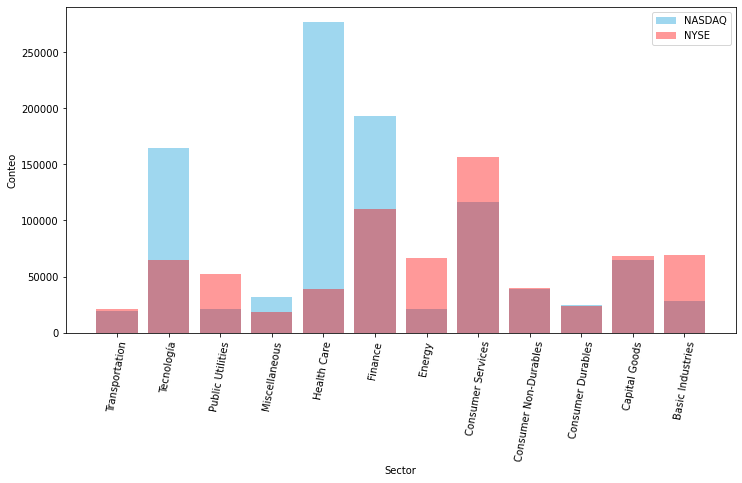

In [75]:
plt.figure(figsize=(12,6))
plt.bar( ex_df_NASDAQ['sector'] , ex_df_NASDAQ["count"], color='skyblue' , label='NASDAQ', alpha=0.8)
plt.bar( ex_df_NYSE['sector'] , ex_df_NYSE["count"] , color = 'red', label = 'NYSE', alpha=0.4)
plt.xticks(rotation=80)
plt.xlabel('Sector')
plt.ylabel('Conteo')
plt.legend()
plt.show()

In [76]:
sec_df = data.select( ['sector','open','close','adjusted'] ).groupBy('sector').mean().toPandas()
sec_df

,sector,avg(open),avg(close),avg(adjusted)
0,Miscellaneous,52.038395,52.063629,51.809730
1,Health Care,119.967633,119.078061,118.973948
2,Public Utilities,35.580777,35.585282,34.730156
3,Energy,24.456590,24.427350,23.684714
4,Consumer Non-Durables,43.328603,43.330386,42.817625
5,Finance,37.774667,37.779002,37.100285
6,Basic Industries,266410.354701,265750.361367,263865.510703
7,Capital Goods,60.488544,60.516555,59.975123
8,Tecnología,49.516045,49.534799,49.252340
9,Consumer Services,55.078867,55.055248,54.361878


In [77]:
cols = sec_df.columns
cols

Index(['sector', 'avg(open)', 'avg(close)', 'avg(adjusted)'], dtype='object')

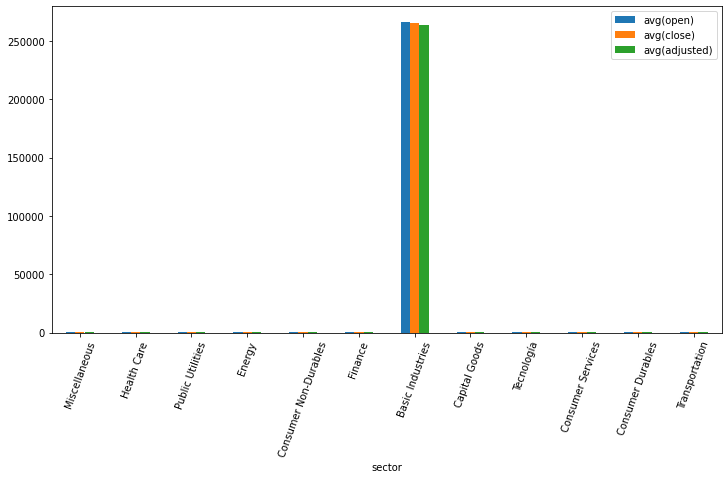

In [78]:
sec_df.plot( kind='bar', x=cols[0], y=cols[1:], rot=70, figsize=(12,6)  )
plt.show()

In [79]:
# Eliminamos los registros de "Basic Industries"
sec_df2 = sec_df[ sec_df['sector']!='Basic Industries' ]
sec_df2

,sector,avg(open),avg(close),avg(adjusted)
0,Miscellaneous,52.038395,52.063629,51.809730
1,Health Care,119.967633,119.078061,118.973948
2,Public Utilities,35.580777,35.585282,34.730156
3,Energy,24.456590,24.427350,23.684714
4,Consumer Non-Durables,43.328603,43.330386,42.817625
5,Finance,37.774667,37.779002,37.100285
7,Capital Goods,60.488544,60.516555,59.975123
8,Tecnología,49.516045,49.534799,49.252340
9,Consumer Services,55.078867,55.055248,54.361878
10,Consumer Durables,391.031540,390.104155,389.641764


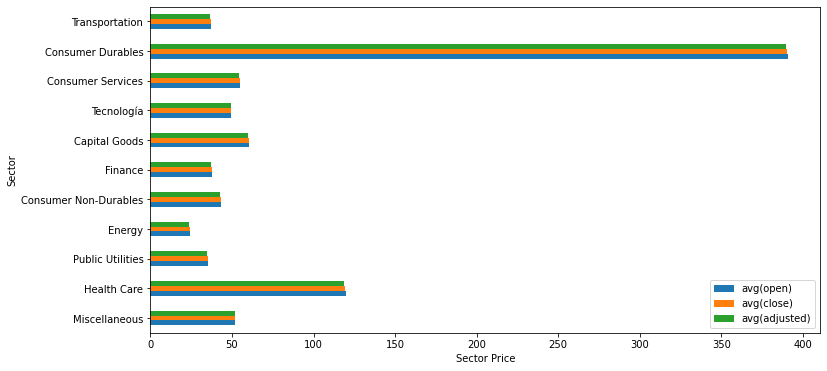

In [80]:
sec_df2.plot( kind='barh', x=cols[0], y=cols[1:], rot=0, figsize=(12,6) )
plt.ylabel('Sector')
plt.xlabel('Sector Price')
plt.show()

### Graficando series de tiempo

In [81]:
tech = data.where( data['sector']=='Tecnología' ).select(['date','open','close','adjusted'])
# en vez de "where" también podemos usar "filter"

tech.show(N)

+----------+----+-----+--------+
|      date|open|close|adjusted|
+----------+----+-----+--------+
|2019-01-02|8.51| 8.55|    8.55|
|2019-01-03| 8.5| 8.59|    8.59|
|2019-01-04|8.72| 8.88|    8.88|
|2019-01-07|8.88| 8.86|    8.86|
|2019-01-08|8.93|  9.4|     9.4|
+----------+----+-----+--------+
only showing top 5 rows



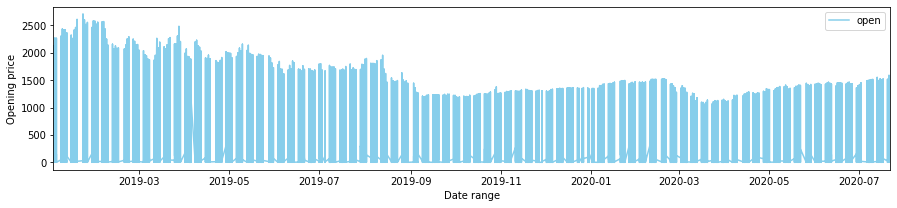

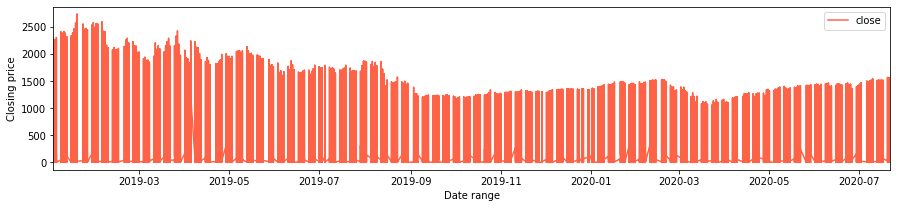

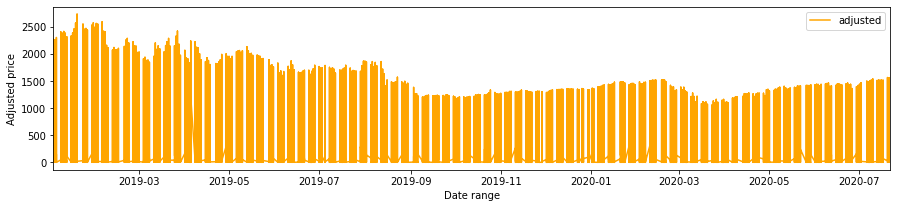

In [82]:
largo = 15
alto = 3

tech.toPandas().plot(kind = 'line', x='date', y='open', figsize=(largo,alto), color='skyblue')
plt.xlabel('Date range')
plt.ylabel('Opening price')
plt.show()

tech.toPandas().plot(kind = 'line', x='date', y='close', figsize=(largo,alto), color='tomato')
plt.xlabel('Date range')
plt.ylabel('Closing price')
plt.show()

tech.toPandas().plot(kind = 'line', x='date', y='adjusted', figsize=(largo,alto), color='orange')
plt.xlabel('Date range')
plt.ylabel('Adjusted price')
plt.show()

In [83]:
data_df = data.select(['industry', 'open', 'close', 'adjusted']).groupBy('industry').mean().toPandas()
data_df

,industry,avg(open),avg(close),avg(adjusted)
0,Finance/Investors Services,5.134402,5.136631,4.991354
1,Miscellaneous,16.385883,16.359879,16.148959
2,Investment Bankers/Brokers/Service,58.950581,58.983086,58.157837
3,Food Distributors,43.274509,43.273178,42.910476
4,Broadcasting,24.916787,24.917388,24.699102
...,...,...,...,...
130,Wholesale Distributors,16.608839,16.602717,16.602717
131,Electronics Distribution,6.428699,6.430408,6.377569
132,Tools/Hardware,70.412755,70.475944,69.670351
133,Tobacco,32.467832,32.455689,32.213047


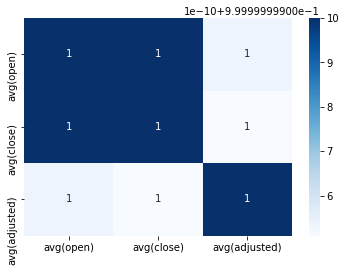

In [84]:
import seaborn as sb

corr = data_df.corr()
sb.heatmap(corr, cmap="Blues", annot=True)
plt.show()

## Escritura y lectura de archivos externos
Guardar los datos en archivos externos nos permite persistir los datos para volver a cargarlos posteriormente y evitar el nuevo cálculo de éstos

#### Escritura y lectura de archivos en formato .csv

In [85]:
import os

# En caso de que exista la ruta la borramos para volver a crearla:
if os.path.exists( './saved_DataFrames/dataset.csv' ):
    !rm -r ./saved_DataFrames/dataset.csv

# Guardar archivos en formato .csv:
data.write.csv('./saved_DataFrames/dataset.csv', header=True)

In [86]:
# Lectura de datos:
spark.read.csv('./saved_DataFrames/dataset.csv', sep = ',', header = True).show(N)

+-------+------+----------+---------+---------+---------+---------+--------+---------+-----------------+--------------------+--------+------------------+
|     c0|symbol|      date|     open|     high|      low|    close|  volume| adjusted|           sector|            industry|exchange|          promedio|
+-------+------+----------+---------+---------+---------+---------+--------+---------+-----------------+--------------------+--------+------------------+
|1327602|   HTZ|2020-07-20|     1.47|     1.53|     1.41|     1.49|12763000|     1.49|Consumer Services|Rental/Leasing Co...|    NYSE|              1.47|
|1327603|   HTZ|2020-07-21|     1.47|     1.49|     1.44|     1.46| 7220600|     1.46|Consumer Services|Rental/Leasing Co...|    NYSE|1.4649999999999999|
|1327604|   HTZ|2020-07-22|     1.47|     1.93|     1.46|     1.74|62002300|     1.74|Consumer Services|Rental/Leasing Co...|    NYSE|1.6949999999999998|
|1327605|   HES|2019-01-02|39.290001|42.400002|39.080002|42.240002| 4692200|

#### Escritura y lectura de archivos en formato .json

In [87]:
# En caso de que exista la ruta la borramos para volver a crearla:
if os.path.exists( './saved_DataFrames/dataset.json' ):
    !rm -r ./saved_DataFrames/dataset.json

# Guardar archivos en formato .json:
data.write.save('./saved_DataFrames/dataset.json', format='json', header=True)

In [88]:
# Lectura de datos:
spark.read.json('./saved_DataFrames/dataset.json').show(N)

+----------+------+----------+----------+--------+----------+--------------------+----------+----------+------------------+-----------------+------+-------+
|  adjusted|    c0|     close|      date|exchange|      high|            industry|       low|      open|          promedio|           sector|symbol| volume|
+----------+------+----------+----------+--------+----------+--------------------+----------+----------+------------------+-----------------+------+-------+
|367.329987|667381|367.329987|2019-03-13|  NASDAQ|369.600006|Other Specialty S...| 365.01001|366.950012|367.30500800000004|Consumer Services|  ORLY| 573200|
|368.160004|667382|368.160004|2019-03-14|  NASDAQ|368.480011|Other Specialty S...|362.790009|366.029999|365.63500999999997|Consumer Services|  ORLY| 687900|
|370.019989|667383|370.019989|2019-03-15|  NASDAQ|371.059998|Other Specialty S...|363.269989|368.859985|367.16499350000004|Consumer Services|  ORLY|1155100|
|375.799988|667384|375.799988|2019-03-18|  NASDAQ|378.3299

#### Escritura y lectura de archivos en formato .parquet

In [89]:
# En caso de que exista la ruta la borramos para volver a crearla:
if os.path.exists( './saved_DataFrames/dataset.parquet' ):
    !rm -r ./saved_DataFrames/dataset.parquet

# Guardar archivos en formato .parquet:
data.write.save('./saved_DataFrames/dataset.parquet', format='parquet', header=True)

In [90]:
# Lectura de datos:
spark.read.parquet('./saved_DataFrames/dataset.parquet').show(N)

+-------+------+----------+---------+---------+---------+---------+--------+---------+-----------------+--------------------+--------+------------------+
|     c0|symbol|      date|     open|     high|      low|    close|  volume| adjusted|           sector|            industry|exchange|          promedio|
+-------+------+----------+---------+---------+---------+---------+--------+---------+-----------------+--------------------+--------+------------------+
|1327602|   HTZ|2020-07-20|     1.47|     1.53|     1.41|     1.49|12763000|     1.49|Consumer Services|Rental/Leasing Co...|    NYSE|              1.47|
|1327603|   HTZ|2020-07-21|     1.47|     1.49|     1.44|     1.46| 7220600|     1.46|Consumer Services|Rental/Leasing Co...|    NYSE|1.4649999999999999|
|1327604|   HTZ|2020-07-22|     1.47|     1.93|     1.46|     1.74|62002300|     1.74|Consumer Services|Rental/Leasing Co...|    NYSE|1.6949999999999998|
|1327605|   HES|2019-01-02|39.290001|42.400002|39.080002|42.240002| 4692200|

### Guardar un conjunto de datos específico

In [91]:
# En caso de que exista la ruta la borramos para volver a crearla:
if os.path.exists( './saved_DataFrames/dataset_select.parquet' ):
    !rm -r ./saved_DataFrames/dataset_select.parquet

# Guardar archivos en formato .parquet:

selected_cols = ['date','open','close','adjusted']

data.select( selected_cols ).write.save('./saved_DataFrames/dataset_select.parquet', format='parquet', header=True)

In [92]:
# Lectura de datos:
spark.read.parquet('./saved_DataFrames/dataset_select.parquet').show(N)

+----------+---------+---------+---------+
|      date|     open|    close| adjusted|
+----------+---------+---------+---------+
|2020-07-20|     1.47|     1.49|     1.49|
|2020-07-21|     1.47|     1.46|     1.46|
|2020-07-22|     1.47|     1.74|     1.74|
|2019-01-02|39.290001|42.240002|41.019516|
|2019-01-03|42.400002|42.389999|41.165176|
+----------+---------+---------+---------+
only showing top 5 rows



#### Cerramos la sesión Spark

In [93]:
spark.stop()